In [ ]:
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MaxNLocator
import pandas as pd
import glob

In [4]:
folder = "/home/marcio/Projects/Random-Graph/Random-Graph/Results/Mean/"
filenames = sorted(glob.glob(folder + 'Biggest_component_1E*_0_1.txt'))
data = [np.loadtxt(fname=f, delimiter=',') for f in filenames]

In [13]:
from sklearn.preprocessing import normalize

In [47]:
regr = linear_model.LinearRegression()
regr.fit(data[4].T[0][20:].reshape(-1,1), (data[4].T[1]/data[4].T[1].max())[20:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
X = np.linspace(0,1,data[4].T[0].shape[0])
y = regr.predict(X.reshape(-1,1))

In [49]:
-regr.intercept_ /regr.coef_

array([-0.00953514])

In [82]:
c = ['#4DA6FF', '#FFAB2E', '#FF38C3', '#3BFF55', '#F8FF36']

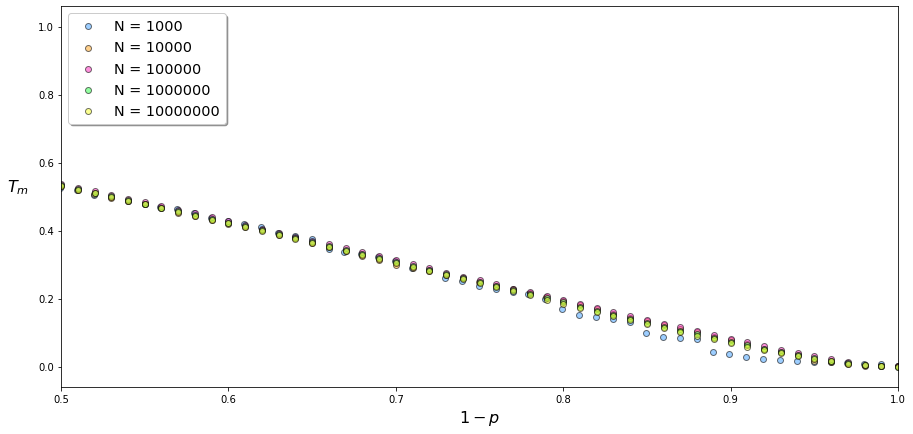

In [96]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }
fig, axs = plt.subplots(figsize=(15, 7))
i = 0
for d in data:
    
    axs.scatter(1-d.T[0], d.T[1]/d.T[1].max(), color='black', facecolors=c[i], label=r'N = %.0f' %N[i], alpha=0.55)
#     ax.plot(X, y)

    axs.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.ylabel('$T_m$', rotation=0, labelpad=20, fontdict=font)
    plt.xlabel('$1 - p$', font)
    plt.xlim(0.5,1)
#     plt.yscale('log')
#     plt.xscale('log')
    i += 1
    # plt.title('$\lambda$ = $f(\mathbb{E}[X$ ~ Zipf$(\gamma = 2.5)])$', fontdict=font)
plt.savefig("../Results/JPG/percolac_log.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [ ]:
regr.coef_

In [51]:
pc = []
for d in data:
    regr = linear_model.LinearRegression()
    regr.fit(d.T[0][10:].reshape(-1,1), (data[4].T[1]/data[4].T[1].max())[10:].reshape(-1,1))
    pc.append((-regr.intercept_ /regr.coef_)[0])

In [52]:
pc

[array([0.00783524]),
 array([0.00741004]),
 array([0.00737088]),
 array([0.00736724]),
 array([0.00736686])]

In [19]:
N = np.array([1e3, 1e4, 1e5, 1e6, 1e7])

In [20]:
1/N

array([1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07])

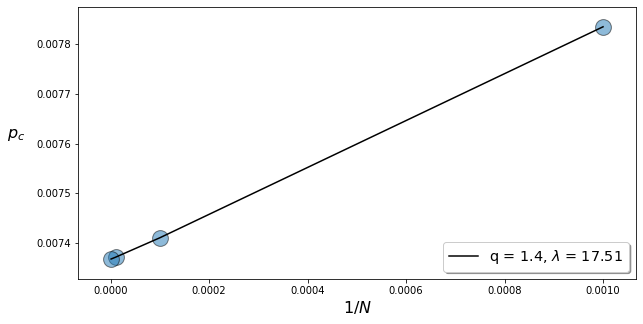

In [60]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot((1/N)[:-1], pc[:-1], color='black', label=r'q = 1.4, $\lambda$ = 17.51')
ax.scatter((1/N)[:-1], pc[:-1], color='black', facecolor='C0', s=250, alpha=0.5)


ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('$p_{c}$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$1/N$', font)
# plt.yscale('log')
# plt.xscale('log')

# plt.title('$\lambda$ = $f(\mathbb{E}[X$ ~ Zipf$(\gamma = 2.5)])$', fontdict=font)
plt.savefig("../Results/JPG/percolac.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')

In [ ]:
pd.DataFrame(percolacao_1E7_1_1).describe()

In [ ]:
data[0].T[0]

In [2]:
percolacao_1E7_0_1 = np.loadtxt("../Results/Mean/Biggest_component_1E7_0_1.txt", delimiter=',')

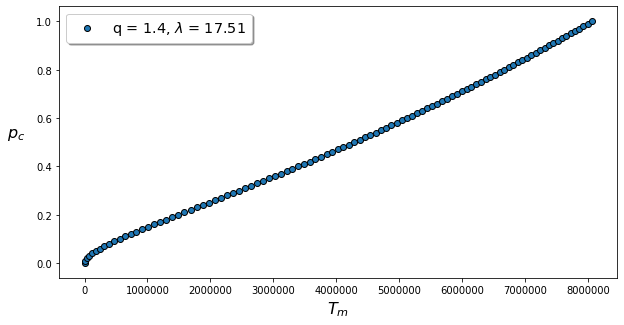

In [3]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font1 ={'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(percolacao_1E7_0_1.T[1], percolacao_1E7_0_1.T[0], color='black', facecolors='C0', label=r'q = 1.4, $\lambda$ = 17.51')


ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('$p_{c}$', rotation=0, labelpad=20, fontdict=font)
plt.xlabel('$T_m$', font)
# plt.yscale('log')
# plt.xscale('log')

# plt.title('$\lambda$ = $f(\mathbb{E}[X$ ~ Zipf$(\gamma = 2.5)])$', fontdict=font)
plt.savefig("../Results/JPG/percolacao_1E7_0_1.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')